# New Business Opportunities by UMBC

# The Problem Frame and Big Picture

In this project I will fetch data about businesses from the yelp API within 15 miles of UMBC.  In this first section I will explain the business problem and corresponding machine learning problem to describe the question at hand and why it is important.  In the following Getting the Data section I will show the process of using the yelp API in order to retreive the data back as json and parsing it into a csv which is then loaded as a pandas dataframe.  This leads to the next section to understand and visualize the data by exploring it where I perform some analysis on the pandas dataframe to find stats and information in the data for problems such as good cheap restaraunts and how close they are to UMBC.  Next is the data prep section where I will perform some feature engineering in attempt to get the best possible results from the machine learning model which is created in the section thereafter.  Following is a section on model selection and evaluation which describes the algorithms and how I determine if the model results are successful before fine-tuning the model.  I will then present the solution before mentioning the limitations and later work.  References and Contributions will be listed at the bottom.

UMBC and college campuses in general draw a lot of people to one area which presents a large opportunity for the surrounding businesses.  If we can determine what businesses are needed and what price level they should be, there may be a world of opportunity for new businesses to have success.  The type of people that gather at college campuses tend to be similar in certain ways, but very different in others.  For example, the bulk of the people there are most likely in the age range of 18-24, interested in going out around campus with friends, and in most cases not necessarily financially well off as they are paying tuition with minimal income.  On the other hand, the people who gather there may be from anywhere across the world; with different cultures, religions, and culinary practices.

With that, there may be a pattern in what types a businesses are most successful around a college campus.  Perhaps they tend to be cheaper places that fit all kinds of cultures.  The first machine learning problem at hand here is: can we detect hidden groups or patterns in businesses of interest to college students, in particular shops and restaurants, within 15 miles of UMBC to see the diversity of them and determine if there are some that should that are redundant and should be gotten rid of and any opportunity for new restaurants and or shops that would fill the void of what is not already there?  For example, say I am looking to start a new business and I want to know if it has a good chance of being successful.  Perhaps there is a void in a certain location for a certain type of business that would be hugely successful if I start it.  In the scenario the stakeholder is the me as the prospective business owner.  And what the stakeholder is asking is what type of business could potentially fill a missing void and be successful as it would be in demand.  In a secondary scenario, there may be cases where some businesses are redundant and with too many of the same businesses, they don't have enough demand to do well.  In this case the stakeholder would be the current business owner struggling and helping him/her see that their business is redundant and potentially offering them help on how to potentially change to be more successful.  Once we see a lack of a certain type of business, the second machine learning problem to build on it is: can we predict the price level for the prospective business based on its features?  To expand upon the findings of what is lacking for types of businesses in a certain location, I will build a model that predicts the price level for that desired business so that the potential owner may know what kind of prices and profits to expect from it in order to be successful.  Pricing and projecting finances/profit is one of the first challenges every new business faces and with this we hope to give them a fast start towards knowing what kind of price level to set to be successful.

The solution will be used to first identify new business opportunities for prospective business owners, then to predict the price level that business would be at based on its features.  I am not sure what the current solution to this problem is - and it probably depends on the prospective business owner.  Some might know enough that they can identify new opportunities themselves and determine a price level themselves as well.  Others might hire data scientists like ourselves to do analysis such as this to find the best opportunity.  Measuring performance of identifying businesses that have a lot of opportunity can be difficult to identify since there is not a straghtforward way.  Mostly, the performace there would be measured by the success of the new businesses once put into place, but even then there are so many factors into success such as management that may not truly show the performance measure that well.  For the second piece of predicting the price level, the performance measure will be the accuracy of predicting the correct price level based on the data that we have.  This aligns with the business objective in that in order for the new business to be successful they need to get their pricing right so putting them at the right level gives them the best chance for success.

The minimum performance measure here to reach the business objective of being able to predict the price level accurately is to be able to do it better than 65.9% (5036 for price level 2 (most occurences) / 7637 total).  This is due to the fact that if we simply picked price level 2 every time, we would have an accuracy of 65.9% in this dummy model so the minimum performance to show we can predict the price level with our features is to beat that 65.9%.

Similar problems exist for all entrprenuers trying to make the most successful businesses.  Talking to entrprenuers to determine what they look for before creating the businesses is a good place to start to gain as much intuition as possible for finding the best opportunities.  To solve the problem manually I would go about trying to find patterns in what businesses were successful.  I am assuming that there is opportunity for new businesses around UMBC.


# Getting the Data

In this section we have the code for receiving the data, cleaning it, and putting it into a csv file.

In [8]:
#imports
import requests #for making the we requests
import json  #for loading the text to json
from configparser import ConfigParser  #for loading the API key from a config file
import csv #for writing to a csv
import pandas as pd #for data analysis
from tabulate import tabulate #for creating tables
from sklearn.preprocessing import normalize #for normalizing the data

For the next code block below, it will not necessarily need to be changed in order to run properly, but the runner of this notebook will need to place a secret.cfg file two directories up with an auth and token section - these are from yelp - to be authenticated upon each call.  You may create a yelp account here: https://www.yelp.com/developers.  And once an account is created, create an app.  Once the app is created, from the manage app page there will be a Client ID and API key.  Put the Client Id in a 'auth' section of the secret.cfg file, and the API key in the 'token' section of the same file.

In [9]:
#load the API key from a file a few directories up so that it is not stored in the git repo.
#this code will not need to be changed in order to run properly, but the runner of this notebook will need to
#place a secret.cfg file two directories up with an auth and token section - these are from yelp - to be authenticated
#upon each call
config = ConfigParser()
config.read('../../secret.cfg')
token = config.get('auth', 'token')

#set it as the header
headers = {'Authorization': 'Bearer %s' % token}

In [10]:
#set the url to the yelp API
url='https://api.yelp.com/v3/businesses/search'
 
#From the yelp API docs, there are a bunch of categories.  I went through and found ones that I believed would
#be of interest to college students.
interestingCategories = ["atvrentals", "airsoft", "amateursportsteams","amusementparks","aquariums","archery","axethrowing","badminton","baseballfields","beaches","bicyclepaths", "bikerentals", "bikeparking", "boating", "bobsledding", "bocceball", "bowling", "bungeejumping", "climbing", "daycamps", "discgolf", "diving", "escapegames", "fencing", "fishing", "fitness", "flyboarding","gokarts","golf","gun_ranges","hiking","horsebackriding","jetskis","lasertag","mini_golf","mountainbiking","paddleboarding","paintball","parks","playgrounds","races","rafting","recreation","sailing","football","swimmingpools","tennis","skatingrinks","arcades","galleries","bingo","movietheaters","eatertainment","festivals","musicvenues","theater","social_clubs","stadiumsarenas","ticketsales","wineries","acnetreatment","barbers","spas","massage","bicycles","acaibowls", "backshop", "bagels", "bakeries", "beer_and_wine", "bento", "beverage_stores", "breweries", "bubbletea", "butcher", "csa", "chimneycakes", "churros", "cideries", "coffee", "coffeeteasupplies", "coffeeroasteries", "convenience", "cupcakes", "customcakes", "delicatessen", "desserts", "distilleries", "diyfood", "donairs", "donuts", "empanadas", "farmersmarket", "fishmonger", "fooddeliveryservices", "foodtrucks",  "friterie", "gelato","grocery","hawkercentre", "honey","icecream","importedfood","intlgrocery","internetcafe","jpsweets","juicebars","kiosk", "kombucha","meaderies", "milkshakebars","gluhwein", "nasilemak","organic_stores", "panzerotti", "eltern_cafes", "cakeshop","piadinapoke", "pretzels", "shavedice", "shavedsnow", "smokehouse", "gourmet", "streetvendors", "sugarshacks", "tea", "tortillas", "wineries","adultentertainment","barcrawl","bars","beergardens","clubcrawl","coffeeshops","comedyclubs","danceclubs","dancerestaurants","karaoke","musicvenues","pianobars","poolhalls","petstore","restaurants","shopping"]

In the below block of code is nested loops.  The outer goes through each category in the list of categories that I believed would be interesting to college students.  The reason I spent the time going through all these groups rather than just simply seraching for terms like 'food' or 'fun' is because of a limitation with the yelp API.  For any one particular query, a maximum of 1,000 businesses may be obtained with it (offset cannot be used above 1,000) and so with breaking the calls down to more specific categories, that minimizes the number of calls that return a number of businesses greater than 1,000 which results in more data for us both in numbers and of higher quality as less is missing.

In [11]:
businesses = []  #start with empty array of businesses to build on
FIFTEEN_MILES = 24140 #this is 15 miles, measured in meters
MAX_RETURN_SIZE = 50 #the max yelp will return is 50 businesses at a time

for category in interestingCategories:  #for each category of interest...
    #set the params and make the initial request
    params = {'categories':category, 'location':'1000 Hilltop Circle Baltimore, MD 21250', 'radius': FIFTEEN_MILES, 'limit':MAX_RETURN_SIZE, 'sort_by':'rating'}
    req=requests.get(url, params=params, headers=headers)
    
    #check the status code of the response
    print('The status code is {}'.format(req.status_code))
    if req.status_code != 200:
        continue  #if it failed... just continue without breaking the process
    resp = json.loads(req.text) #load the text of the response to json
    offset = 0  #use the offset to page through the results
    numToGet = resp["total"]
    numReceived = len(resp["businesses"])
    for business in resp["businesses"]:  #create column of category for each business to save what it was found on
        business["category"] = category
    businesses.extend(resp['businesses']) #extend the business array with the businesses
    while numToGet > numReceived: #while there are still more to get...
        offset += len(resp["businesses"])
        if offset == 1000: #stop at 1000 - this is the limit set by yelp
            break
        #set the params again this time with the updated offset
        params = {'category':category, 'location':'1000 Hilltop Circle Baltimore, MD 21250', 'radius': 24140, 'limit':50, 'offset':offset, 'sort_by':'rating'}
        req=requests.get(url, params=params, headers=headers) #make the request again
        # proceed only if the status code is 200
        print('The status code is {}'.format(req.status_code))
        resp = json.loads(req.text) #load the text to json
        if 'businesses' in resp: #check for the businesses in the output
            numReceived += len(resp["businesses"]) #increase the num received by what we got
            for business in resp["businesses"]:
                business["category"] = category #add the category for these as well
        else:
            break
        businesses.extend(resp['businesses']) #extend the businesses array with the found businesses

The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status code is 200
The status 

In [14]:
#parse the results and write to a csv file
with open('../data/scrapedData.csv', mode='w') as employee_file: #open the csv file...
    writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) #create the writer...
    #write the first row with to be the headers
    writer.writerow(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count', 'categories', 'rating', 'latitude', 'longitude', 'distance', 'address', 'price', 'is_delivery', 'is_pickup', 'category'])
    for business in businesses: #loop through and write a row per business
        price = None #find the info for each business
        categoriesList = []
        categories = None
        isPickup = False
        isDelivery = False
        if 'price' in business:
            price = len(business['price']) #price represented as $, $$, $$$, $$$$ - convert to numeric to be used with sorting
        if 'categories' in business:
            for category in business['categories']:  #save the category titles in one string
                categoriesList.append(category['title'])
            categories = ", ".join(categoriesList)
        if 'delivery' in business['transactions']:
            isDelivery = True
        if 'pickup' in business['transactions']:
            isPickup = True
        writer.writerow([business["id"], business["alias"], business["name"], business["image_url"], business["is_closed"], business["url"], business["review_count"], categories, business["rating"], business["coordinates"]["latitude"], business["coordinates"]["longitude"], business["distance"], " ".join(business["location"]["display_address"]), price, isDelivery, isPickup, business["category"]])

Now we have the scraped data saved in the ../data directory as a csv file.  It can be loaded from any notebook and we will load it in the next section to perform the analysis on it using a pandas dataframe.  I expect the result of this to be around 9,000 entries as it may change depending on the results from the yelp API.  There will be 17 features including id, alias, name, categories, price level, ect.

# Understanding and Visualizing the Data

The question/ problem at hand here is finding hidden groups or patterns in shops/restaurants around UMBC in hopes of determining if there are some redundant and not needed or some that have a great chance to be successful.  Followed by the goal of being able to predict the price level based on the features of the business.  The businesses surrounding UMBC and prospective business owners are our customers, and the more they know about how much opportunity that they have to be successful, the better.  Existing businesses, if they are struggling want to know their competition and how they might change to be successful.  Potential new start-up businesses want to be able to gauge the opportunity to be able to know if their type of business has a solid chance of being successful or not based on what already exists.

In this section I will do some analysis on the pandas dataframe to look for trends that might show some of the patterns in businesses around UMBC.  Our target audience is executives of the surrounding businesses or prospective business owners.  I look for patterns such as the price range of the majority of businesses, their proximity to UMBC, and convenience to see the patterns of what kinds of businesses are more fequent around the university.  This is not to say that all businesses have to fit the trend.  For example, perhaps there are the percentage of college students who are well off financially and can afford to go to a nice restaurant - these nicer restaurants have an opportunity to be successful, but we would expect to see more cheaper restaurants than expensive as the percentage of college students who can afford high prices is likely smaller.

The process for answering this question begins with exploring stats/ information about trends in the restaurants and shops around UMBC that are attractive to prospective students.  This will give us an initial idea of what some trends in the features we can cluster based on look like.  It is an initial attempt based on intuition and if there was more time to carry the project forward, more experimentation and research could be done on what students look for in local businesses around college and I could attack those categories in the exploration.

The first analysis I will do is on the closeness of some of the restaurants and shops around UMBC:


In [16]:
#read in the raw csv file
df = pd.read_csv("../data/scrapedData.csv", encoding= 'utf-8')

#some businesses could be part of the two different categories - drop the duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9083 entries, 0 to 9246
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9083 non-null   object 
 1   alias         9083 non-null   object 
 2   name          9083 non-null   object 
 3   image_url     8950 non-null   object 
 4   is_closed     9083 non-null   bool   
 5   url           9083 non-null   object 
 6   review_count  9083 non-null   int64  
 7   categories    9083 non-null   object 
 8   rating        9083 non-null   float64
 9   latitude      9083 non-null   float64
 10  longitude     9083 non-null   float64
 11  distance      9083 non-null   float64
 12  address       9083 non-null   object 
 13  price         7296 non-null   float64
 14  is_delivery   9083 non-null   bool   
 15  is_pickup     9083 non-null   bool   
 16  category      9083 non-null   object 
dtypes: bool(3), float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [17]:
df["price"].value_counts()

2.0    4819
1.0    2110
3.0     346
4.0      21
Name: price, dtype: int64

In [18]:
#create some dataframes that will be used throughout for analysis to avoid duplication
restaurants = df.loc[df["category"] == "restaurants"] # get df with all the restaurants
shops = df.loc[df["category"] == "shopping"] # get df with all the shops

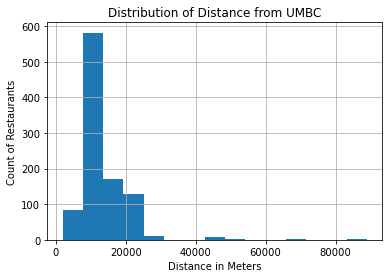

In [19]:
#we can look for trends in the data... how close are the bulk of the restaurants around UMBC?
hist = restaurants.hist(column="distance", bins=15) #histogram of the distance column to see the distribution

#set the labels
for ax in hist.flatten():
    ax.set_xlabel("Distance in Meters")
    ax.set_ylabel("Count of Restaurants")
    ax.set_title("Distribution of Distance from UMBC")

Based on the histogram above, we see that the data is skewed right, showing that the majority of restaurants are within 10,000 meters (~6 miles) of campus.  This takeaway is that the bulk of restaurants within 15 miles of UMBC are within roughly 6 miles of campus.  This could potentially tell us that if a student is going to make the effort to travel outside the 6 miles from campus, any restaurant outside that range might have to be a bit more special or unique to make the trip worth it.

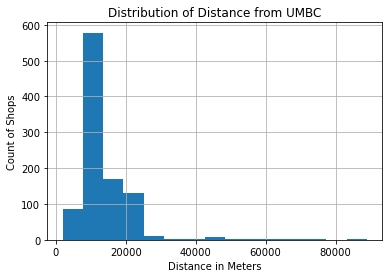

In [20]:
#we can look for trends in the data... how close are the bulk of the shops around UMBC?
hist = shops.hist(column="distance", bins=15)

for ax in hist.flatten():
    ax.set_xlabel("Distance in Meters")
    ax.set_ylabel("Count of Shops")
    ax.set_title("Distribution of Distance from UMBC")

We can do the same, but this time for shops - with many students living on campus or off campus but close to it, it is important to have convenient stores near by for the daily essentials.  Based on the histogram above, we see again that the majority of stores are also within the about 10,000 meters/6 miles away.  This leads us to the same interpretation as with the restuarants - if a student is going to make the effort to travel outside the roughly 6 mile range it likely is going to have to be something that they can not get within the 6 mile range.

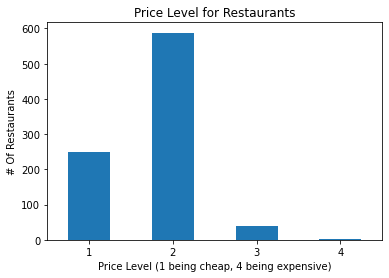

In [21]:
#we can look for trends in the data... what level of prices are the restaurants around UMBC?
restaurants["price"].value_counts().reindex([1,2,3,4]).plot(kind='bar', title="Price Level for Restaurants", ylabel="# Of Restaurants", xlabel="Price Level (1 being cheap, 4 being expensive)", rot=0);

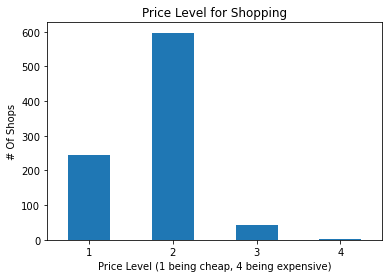

In [22]:
#we can look for trends in the data... what level of prices are the restaurants around UMBC?
shops["price"].value_counts().reindex([1,2,3,4]).plot(kind='bar', title="Price Level for Shopping", ylabel="# Of Shops", xlabel="Price Level (1 being cheap, 4 being expensive)", rot=0);

College students tend to be in debt on loans and having local restaurants and shops that keep the essentials relatively cheap goes a long way for a students' financial well being.  Yelp defines these 4 price levels as: 1 - inexpensive, 2 - moderate, 3 - pricey, 4 - ultra high-end.  In the above 2 bar charts we see that the large majority of restaurants and shops around UMBC are either inexpensive or moderate.  Then there are also a few pricey and ultra high-end ones for the minority of students who can afford those luxuries.  This is the kind of trend we expected to see and it shows the affordability of what is around, but also the diversity to have some pricey more fancy options as well.

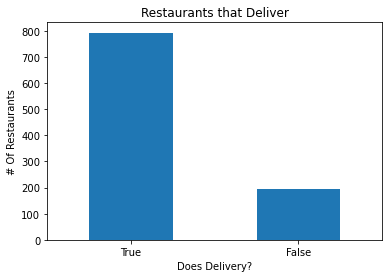

In [23]:
#The local businesses are more relevant for recruiting students that are going to live on campus.  For some, they
#may not have a car and it could be important to have businesses around that deliver
#Are there a lot of restaurants and shops that deliver?
restaurants["is_delivery"].value_counts().plot(kind='bar', title="Restaurants that Deliver", ylabel="# Of Restaurants", xlabel="Does Delivery?", rot=0);

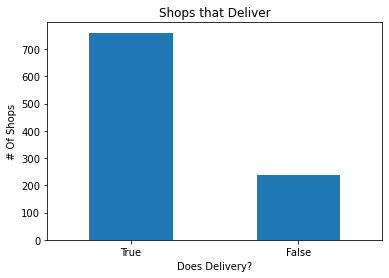

In [24]:
shops["is_delivery"].value_counts().plot(kind='bar', title="Shops that Deliver", ylabel="# Of Shops", xlabel="Does Delivery?", rot=0);

In the above two bar charts, we can see that the large majority of shops and restaurants around UMBC are available for delivery.  This kind of feature in a business could make a bigger impact being close to a college campus as some students on campus might not have a car or want to spend the money or time for an uber/taxi.  Over 300 restaurants deliver compared to under 100 that do not, and over 600 shops deliver compared to under 300 that do not.  The conclusion is that this convenience is probably appealing to a lot of students who tend to have tight schedules but also want off-campus food or need shopping essentials and an important thing to note for businesses.

In [25]:
#we could also put together a list of categories available within the 15 miles of UMBC for both restaurants
#and shops:
# here we make a function that takes in a df and returns a new df consisting of the categories and counts of each
#of those categories
def categoriesDF(dfToGetCategoriesFrom):
    categoriesFound = {}
    for index, row in dfToGetCategoriesFrom.iterrows():
        categories = row['categories'].split(', ')
        for category in categories:
            if category in categoriesFound:
                categoriesFound[category] += 1
            else:
                categoriesFound[category] = 1
    categoriesFound = {k: v for k, v in sorted(categoriesFound.items(), key=lambda item: item[1], reverse=True)}
    return pd.DataFrame(categoriesFound.items(), columns=["Category", "Number of Occurences"])

In [26]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #set option to print entire dataframe
print(categoriesDF(shops))

                             Category  Number of Occurences
0              American (Traditional)                    99
1                  Breakfast & Brunch                    88
2                             Seafood                    77
3                          Sandwiches                    73
4                               Pizza                    67
5                      American (New)                    66
6                        Coffee & Tea                    59
7                                Bars                    58
8                             Italian                    58
9                          Sushi Bars                    56
10                            Mexican                    46
11                           Bakeries                    44
12                              Cafes                    41
13                           Japanese                    39
14                             Indian                    39
15                           Desserts   

In [27]:
#and for restaurants:
print(categoriesDF(restaurants))

                             Category  Number of Occurences
0              American (Traditional)                   100
1                  Breakfast & Brunch                    92
2                             Seafood                    79
3                          Sandwiches                    78
4                      American (New)                    70
5                               Pizza                    69
6                        Coffee & Tea                    63
7                             Italian                    60
8                                Bars                    60
9                          Sushi Bars                    56
10                            Mexican                    49
11                           Bakeries                    47
12                              Cafes                    47
13                             Indian                    43
14                      Mediterranean                    41
15                           Desserts   

As shown above, there are 242 different categories of shops and 143 different categories for food.  One thing I noticed was that shops and restaurants seem to overlap in the categories that they have and what yelp uses to distinguish between a "shop" and a "restaurant" may be a fuzzy line to draw sometimes.  None the less, there are so many diverse categories showing that many different kinds of shops and restaurants have the chance to be successful.  In our analysis we will try to find where there might be too much of one category, or not enough of another based on hidden patterns.  Next lets explore some patterns in the price based on features.

In [28]:
#Let's first create a function that creates the df with counts to avoid code duplication:
def create_counts_df(group_x_axis, group_y_axis):
    counts_df = None #initialize here for scope
    counts_df = df[group_x_axis].groupby([df[group_x_axis], df[group_y_axis]]).count()
    counts_df = counts_df.to_frame()
    counts_df.columns = ["Count"]
    counts_df = counts_df.reset_index()
    return counts_df

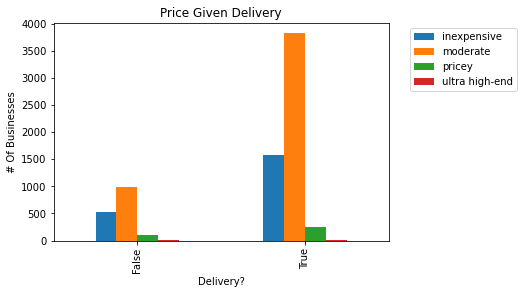

In [35]:
#Lets see if there are patterns for weapon based on description
price_delivery_counts = create_counts_df("is_delivery", "price")

ax = price_delivery_counts.pivot(index='is_delivery', columns='price').plot(kind='bar', title="Price Given Delivery", ylabel="# Of Businesses", xlabel="Delivery?")
patches, labels = ax.get_legend_handles_labels()
labels = ['inexpensive', 'moderate', 'pricey', 'ultra high-end']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Based on the graphic above, it looks like whether or not the business delivers does not have too much of an impact on the price level.  For the restaurants that deliver, there are just more of them and it appears that the ratios stay about the same between the two.  The moderately priced businesses are about double that of the inexpensive ones.  Just as there are more businesses that deliver, there are more of each kind of price level that deliver.

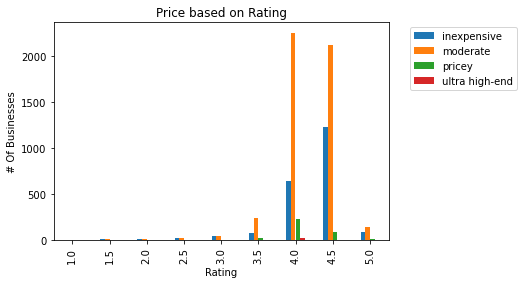

In [37]:
#Lets see if there are patterns for weapon based on description
price_delivery_counts = create_counts_df("rating", "price")

ax = price_delivery_counts.pivot(index='rating', columns='price').plot(kind='bar', title="Price based on Rating", ylabel="# Of Businesses", xlabel="Rating")
patches, labels = ax.get_legend_handles_labels()
labels = ['inexpensive', 'moderate', 'pricey', 'ultra high-end']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Based on the graphic above, it appears that the rating does have a slight impact on the price level.  The ratios appear different.  For example, a rating of 4.5 stars seems to have more inexpensive businesses than the expensive ones.  Perhaps this tells us something - that the more well like businesses tend to be on the cheaper side.  You get what you pay for type of thing where if you charge more, it needs to be worth it.

# Data Prep

In this section I prepare the data to be fed to the machine learning models by performing feature engineering.  I do things like dropping the duplicates, filling/dropping NaN values, creating dummy variables, and normalizing the data.

In [40]:
#read in the raw csv file
df = pd.read_csv("../data/scrapedData.csv", encoding= 'utf-8')

#some businesses could be part of the two different categories - drop the duplicates
df = df.drop_duplicates()

In [41]:
#First, I am going to replace all Nan values in the price column with 0's.  These null values seem like they are
#more so for things that do not have a cost associated to them, so I will represent that by using 0's
df['price'] = df['price'].fillna(0)

In [42]:
#Next, there are some categorical variables that would be useful to have in our model - so I will create them as
#dummy variables to use them numerically.

#here we create dummy features for each of the categorical columns we see as valuable for our model
#the pandas get_dummies function returns a dataframe with the dummies used for that column
#then I concat that dataframe onto the original and drop the original column

#but first lets replace the true/false with more intuitive yes_delivery/no_delivery and yes_pickup/no_pickup
df.loc[df.is_delivery == False, "is_delivery"] = "no_delivery"
df.loc[df.is_delivery == True, "is_delivery"] = "yes_delivery"
df.loc[df.is_pickup == False, "is_pickup"] = "no_pickup"
df.loc[df.is_pickup == True, "is_pickup"] = "yes_pickup"

dummies = pd.get_dummies(df['is_delivery'])
dummyDF = pd.concat([df, dummies], axis=1).drop(['is_delivery'], axis=1)

dummies = pd.get_dummies(df['is_pickup'])
dummies = dummies.rename(columns={"False": "no_pickup", "True": "yes_pickup"})
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['is_pickup'], axis=1) #add onto the dummies DF

dummies = pd.get_dummies(df['category'])
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['category'], axis=1)

#Drop all the rest of the columns as they are not necessary for the model
dummyDF = dummyDF.drop(['id'], axis=1)
dummyDF = dummyDF.drop(['alias'], axis=1)
dummyDF = dummyDF.drop(['name'], axis=1)
dummyDF = dummyDF.drop(['image_url'], axis=1)
dummyDF = dummyDF.drop(['is_closed'], axis=1) #false for all the data we have
dummyDF = dummyDF.drop(['url'], axis=1)
dummyDF = dummyDF.drop(['address'], axis=1)
dummyDF = dummyDF.drop(['categories'], axis=1)

In [45]:
#Now to avoid issues where the numerical difference between numbers makes a difference in the clustering,
#since clusters are based on the distance of points from one another, I need to normalize before feeding to 
#the model.

#in order to do this we need to drop Nan rows
dummyDF = dummyDF.dropna()

#normalize the dummyDF
dummyDFScaled = normalize(dummyDF)
dummyDFScaled = pd.DataFrame(dummyDFScaled, columns=dummyDF.columns)
dummyDFScaled.head()

,review_count,rating,latitude,longitude,distance,price,no_delivery,yes_delivery,no_pickup,yes_pickup,acaibowls,acnetreatment,adultentertainment,airsoft,amateursportsteams,amusementparks,aquariums,arcades,archery,axethrowing,bagels,bakeries,barbers,bars,baseballfields,beaches,beer_and_wine,beergardens,bikerentals,bingo,boating,bowling,breweries,bubbletea,butcher,cakeshop,climbing,coffee,coffeeroasteries,comedyclubs,csa,cupcakes,customcakes,danceclubs,daycamps,desserts,discgolf,distilleries,diving,diyfood,donuts,eatertainment,empanadas,escapegames,farmersmarket,fencing,festivals,fishing,fitness,fooddeliveryservices,foodtrucks,football,galleries,gelato,gokarts,golf,gourmet,grocery,gun_ranges,hiking,honey,horsebackriding,icecream,importedfood,internetcafe,intlgrocery,juicebars,karaoke,kombucha,lasertag,massage,meaderies,movietheaters,musicvenues,organic_stores,paddleboarding,paintball,parks,petstore,piadinapoke,playgrounds,poolhalls,pretzels,races,rafting,recreation,restaurants,sailing,shavedice,shavedsnow,shopping,skatingrinks,smokehouse,social_clubs,spas,stadiumsarenas,streetvendors,swimmingpools,tea,tennis,theater,ticketsales,wineries
0,0.000418,0.000251,0.003273,-0.006403,0.999974,0.0,0.000084,0.0,0.000084,0.0,0.0,0.0,0.0,0.000084,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000518,0.000207,0.002040,-0.003965,0.999990,0.0,0.000052,0.0,0.000052,0.0,0.0,0.0,0.0,0.000000,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000187,0.000421,0.003675,-0.007168,0.999967,0.0,0.000094,0.0,0.000094,0.0,0.0,0.0,0.0,0.000000,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000052,0.000260,0.002034,-0.003988,0.999990,0.0,0.000052,0.0,0.000052,0.0,0.0,0.0,0.0,0.000000,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000091,0.000160,0.001784,-0.003503,0.999992,0.0,0.000046,0.0,0.000046,0.0,0.0,0.0,0.0,0.000000,0.000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

The two main algorithms that we have taken a look at in class are the KMeans model and Hierarchical Clustering models.  They each have their advantages and disadvantages.

Let's begin with KMeans:

In K-Means clustering, K is the number of cluster's we will have the model look for.  Each cluster is given a centroid and the way the model works is the following: start by placing k centroids randomly, but preferably as far apart from each other as possible as the initial placement of the centroids can have an effect on the results of the algorithm (running the algorithm multiple times can help reduce this effect since it is sensitive to the initial placement).  The sklearn kmeans algorithm chooses the initial centroid placements in a smart way by default to get to convergence faster.  Next, it takes every point in the space and assign it to one of the centroids based on its euclidean distance between the centroid and observation.  From there, the centroid location is then re-calculated to be the center of all the points assigned to it.  This process is repeated until either no points change centroids or after hitting a max number of iterations.

K-Means has some weaknesses such as its sensitiveness of where the centroids are initially placed.  Also it is possible that a centroid starts out with zero data points assigned to it and so it never moves which is a problem that is generally ignored.  The biggest issue with it in our case for our business problem is in the averaging nature of the algorithm, it tends to try to make the clusters the same size.  For us, that is a bad thing as our clusters are likely not the same size.  I say this because we obviously saw many more cheaper restaurants/shops than expensive ones.  I also expect the locations of the restaurants/shops to be uneven in where they are located.  For this reason I think Hierarchical clustering might be better for us - let's take a look at it.

Hierarchical Clustering:

The main idea is this: say we have all of the n datapoints each as individual clusters so at the beginning we have n clusters.  The algorithm then combines the two most similar clusters until there is only one big cluster left which builds the hierarchy of clusters which creates a tree-like diagream that we call a dendrogram allowing us to view the clusters available for each possible number of clusters from 1 to n.  This is one advantage over k-means where we would have to set the number of clusters before the fact every time.

There are two main types of Hierarchical Clustering: agglomerative and divisive.  In agglomerative hierarchical clustering we assign each individual point to its own cluster at the beginning and then at each iteration merge the closest pair of clusters and repeat until only a single cluster is left.  Divisive works just the opposite way - starting with one single cluster of all points and splitting out the data point each iteration until each cluster only contains a single data point.  For the purpose of our project we will focus on agglomerative clustering and its types.

The types of agglomerative clustering have to do with the way we determine which two clusters are the most similar.  The 4 types are: single linkage, complete linkage, average linkage, and ward linkage.  I explain them here:

- Single linkage: takes the minimum distance between any two given points from one cluster to the other.  It is good at separating non-elliptical shapes as long as the gap between the two clusters is not small.  It is not good when there is noise between clusters.
- Complete linkage: just the opposite of single linkage - this one takes the maximum distance between any two given points from one cluster to the other.  This approach does well when there is noise between the clusters.  It does not do well when there are large clusters and tends to break them.  It tends to be biased towards globular clusters.
- Average linkage: the distance is defined as the average distance between the average values of each of the datapoints of the clusters.  It again does well when there is noise but is biased toward glbular clusters and takes the less popular approach of comparing the distances between the centroids of the clusters.
- Ward linkage: Finds the pair of clusters that leads to minimum increase in total within-cluster variance after merging at each step.  Ward's clustering technique is again good at separating when there is noise, and biased towards globular clusters.

I experiment with these algorithms below to compare and select the best one.

In [77]:
# imports
## ML Libraries
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Some other necessary libraries
import matplotlib.pyplot as plt
import numpy as np

## metrics and reporting
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_validate

## to retrive some data
import pickle


## To be able to reproduce the results let's set the random_seed
%matplotlib inline

In [47]:

## let's instantiate kmeans algorithm
## don't forget to check its parameters
k_means = KMeans(n_clusters= 4)

# dont forget to fit the model!
k_means.fit(dummyDFScaled)

## we make a prediction for each point
y_hat = k_means.predict(dummyDFScaled)

## we can access the coordinates of the cluster centers by cluster_centers_ method
cl_centers = k_means.cluster_centers_

#In this case plotting it does not really make a lot of sense since there are so many dimensions.
#It is not really possible for us to visualize all of these features in a single space.
## note that the colors are different - Is this a problem?
#plt.scatter(dummyDFScaled[:,0], dummyDFScaled[:,1], c = y_hat, s = 25)


## also let's mark the cluster centers too.
#plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

The above implements k-means clustering initially with 4 clusters.  One of the challenges here is to determine the number of clusters that are optimal for our model.  The technique to try to find the optimal number of clusters is the KElbowVisualizer where the elbow tends to be the optimal number of clusters.  I try this using a few different metrics to see the results.

In [48]:
import sys

!conda install --yes --prefix {sys.prefix} -c districtdatalabs yellowbrick

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-runner-5.2          |             py_0          13 KB
    yellowbrick-1.2            |           py38_0         286 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         299 KB

The following NEW packages will be INSTALLED:

  pytest-runner      pkgs/main/noarch::pytest-runner-5.2-py_0
  yellowbrick        districtdatalabs/osx-64::yellowbrick-1.2-py38_0



yellowbrick-1.2      | 286 KB    | ##################################### | 100% 
pytest-runner-5.2    | 13 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


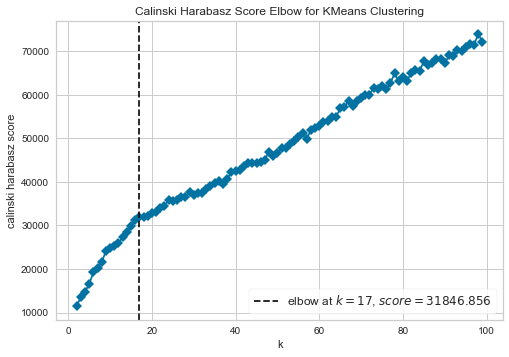

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [50]:
##  install yellowbrck library -- pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,100), metric = 'calinski_harabasz', timings=False)

visualizer.fit(dummyDFScaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Based on the above, we see that the optimal number of clusters is 17.  This is where the slope of the graph appears to change and make the 'elbow'.  This metric measures the variance ratio citerion, and is the ratio of the sum of between-clusters dispersion and inter-cluster dispersion.  Generally, the higher the score the better.  The scores are better when clusters are dense and well separated and fast to compute.  We also do not want to create too many clusters to where they are all the broken out too far, hence the elbow method.  With this, we capture the optimal variance within the clusters without too many where we have a higher chance of breaking apart groups that have a lot in common. 

Next, I try the silhouette method to see its results:

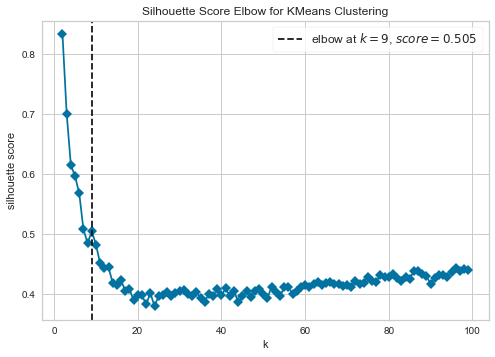

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model,
                              k=(2,100),
                              metric='silhouette', 
                              timings=False, 
                              locate_elbow=True)

visualizer.fit(dummyDFScaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

I took the same elbow approach to find the best number of clusters based on the silhouette score.  In this case the result was a little different - 9 was found to be the optimal number of clusters.  The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters - so, generally the higher the score is, the better the model.  It ranges from -1 to +1 and a high score indicates that a given observation is well matched to its own cluster while being poorly matched to the surrounding clusters.  It does this by calculating the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).  Values near zero indicate overlapping clusters while negative values generally indicate instances in the wrong cluster as a different cluster is more similar.  Obiously, if the number of clusters is set to be small, the datapoints inside will match that cluster well since there will be a lot there and not match the other as well but this does not necessarily reveal an optimal amount of information as breaking the groups out further could tell us more information.  That is again why the elbow method is used here.  This would tell us that there are optimally 9 different groups of businesses in our dataset.  This metric is a good choice for our problem because it is exactly a measure that we want - we want all of what is in a cluster to be similar while different from the other clusters.  It also provides a more obvious elbow.  The one in the chart for calinski harabasz isn't as defined and clear.  So, the optimal 9 clusters in this case looks like we can be a little more confident that it is the optimal number of clusters from the silhouette score.  The drawback is that it takes longer to compute, but for our amount of data it is not that big of a deal.  So, we will use the 9 clusters as our optimal number for the kmeans algorithm.

Next, we look at hierachial clustering:

In [99]:
#Lets try some Hierarchical Clustering
#First start by creating a dendrogram

In [61]:
# calculate and construct the dendrogram 
# calculate full dendrogram
#NOTE: this may take a long time to calculate and display and may not be too interpretable.  The truncated version
#in the next code cell is better.
Z = linkage(dummyDFScaled, 'single')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

KeyboardInterrupt: 

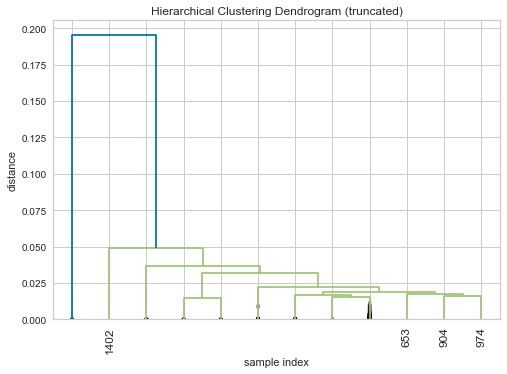

In [62]:
# trimming and truncating the dendrogram 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

The truncated dendrogram above shows the higher level for the clusters created.  If I make the x-axis the cutoff and draw a horizontal line there, it would result in there being 12 clusters.  Visually, this looks like the optimal number for the hierachial clustering.

Let's see the results for each type of agglomerative clustering:

In [63]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [64]:
#using ward:
cluster = AgglomerativeClustering(n_clusters=12, linkage="ward")
pred_business_clust = cluster.fit_predict(dummyDFScaled)
# evaluation - silhouette score 
silhouette_score(dummyDFScaled, pred_business_clust)

0.46056421218849397

In [65]:
#using complete
cluster = AgglomerativeClustering(n_clusters=12, linkage="complete")
pred_business_clust = cluster.fit_predict(dummyDFScaled)
# evaluation - silhouette score 
silhouette_score(dummyDFScaled, pred_business_clust)

0.5571429960020297

In [66]:
#using average
cluster = AgglomerativeClustering(n_clusters=12, linkage="average")
pred_business_clust = cluster.fit_predict(dummyDFScaled)
# evaluation - silhouette score 
silhouette_score(dummyDFScaled, pred_business_clust)

0.6348127193435188

In [67]:
#using single
cluster = AgglomerativeClustering(n_clusters=12, linkage="single")
pred_business_clust = cluster.fit_predict(dummyDFScaled)
# evaluation - silhouette score 
silhouette_score(dummyDFScaled, pred_business_clust)

0.6614484427567814

In [68]:
#using single with 9 clusters for k-means comparison
cluster = AgglomerativeClustering(n_clusters=9, linkage="single")
pred_business_clust = cluster.fit_predict(dummyDFScaled)
# evaluation - silhouette score 
silhouette_score(dummyDFScaled, pred_business_clust)

0.6963836727017972

Based on the above results, we see that for agglomerative clustering using the number of clusters as 12 gives us an optimal silhouette of 0.66 and comes when we use the 'single' linkage method.  Compared to the results for k-means, this is way better.  If we turn the number of clusters down to 9 here to compare the silhouette score result with that of k-means, for agglomerative clustering using the 'single' linkage we get a silhouette score of 0.697 compared to the 0.492 we saw using k-means for a increase of over 0.2.  This was again somewhat expected as we know that k-means likes to try to make clusters the same size and in our case the clusters are most definitely going to need to be different sizes to be the most accurate as there are more of some types of businesses than others like more cheap restaurants than expensive ones.  

For our optimal model - we will pick agglomerative clustering using 12 clusters and the 'single' linkage.

Next we need to analyze for the hidden groups of businesses based off of our cluster model:

In [69]:
#create a new column for the cluster predictions:
cluster = AgglomerativeClustering(n_clusters=12, linkage="single")

dummyDF['cluster-label'] = cluster.fit_predict(dummyDFScaled)
dummyDF.head()

#Write to csv for the clustered_data
dummyDF.to_csv('../data/clustered_data.csv', index = False)

In [70]:
dummyDF['cluster-label'].value_counts()

1     8949
0       59
2       21
7       14
5       14
3       13
10       6
4        3
6        1
11       1
9        1
8        1
Name: cluster-label, dtype: int64

In the above, we see the left hand column as the cluster label and the right hand column as the count of instances in that cluster.  The large majority of businesses were put into cluster 1.  And 4 clusters only had 1 business in them.  This tells us that the large majority of businesses were seen as the same.  The challenge now is to figure out why they the others were different enough to be placed in different clusters.

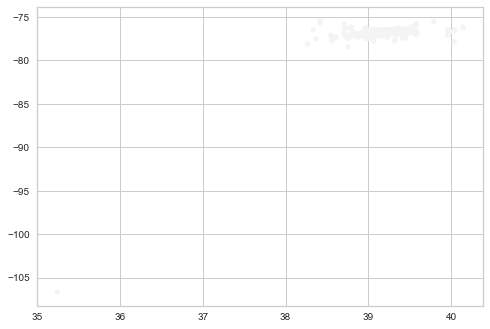

In [71]:
#we can investigate some visuals to see if anything sticks out
y_hat = dummyDF['cluster-label']
plt.scatter(dummyDF['latitude'], dummyDF['longitude'],c = y_hat, s = 25)


The latitude/longitude does not seem to have much of an effect on the cluster as they are all colored the same here.

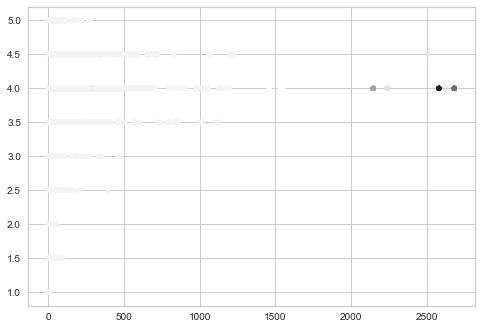

In [72]:
y_hat = dummyDF['cluster-label']
plt.scatter(dummyDF['review_count'], dummyDF['rating'],c = y_hat, s = 25)

Here it looks like the couple of businesses with 2000 plus reviews were placed in different clusters - perhaps this tells us something about those businesses - a lot of people have gone there and they may be more popular.  These are ones that definitely would not be weeded out by our analysis since they are interpreted to be popular.

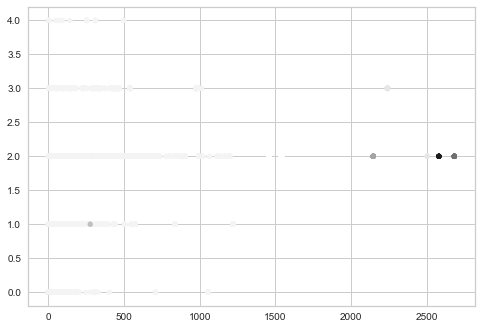

In [73]:
y_hat = dummyDF['cluster-label']
plt.scatter(dummyDF['review_count'], dummyDF['price'],c = y_hat, s = 25)

It does not look like price had an impact on the cluster.

Now onto the classification models:

In [82]:
#Function to Draw tree taken from python utils file

def draw_tree(estimator, figsize =(15, 5), feature_names = ["Hits", "Years"]):
    """
    Takes a decision  tree estimator and plots it's tree structure
    :param estimator: A sklearn decision tree estimator. Should be fitted.
    :param figsize: tuple. (int, int).
    :param feature_names:
    :return: It returns a plot. The image is not saved.
    """
    fig = plt.figure(figsize= figsize)
    _ = tree.plot_tree(estimator,
                       feature_names= feature_names,
                       filled=True)

In [91]:
# get rid of businesses without a price level
dummyDF = dummyDF[dummyDF['price'] != 0]
dummyDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7296 entries, 35 to 9246
Columns: 114 entries, review_count to cluster-label
dtypes: float64(5), int64(2), uint8(107)
memory usage: 1.2 MB


In [92]:
## here let's apply sklearn DecisionTreeClassifier
# this is a function that takes in pandas dataframe as the dataset and from it computes the decision tree, aiming
# to predict the weapon, and prints out a confusion matrix, report, and tree itself
def createDecisionTree(dataSet, max_leaf_nodes_in= 5, min_impurity_split_in=None, ccp_alpha_in=0.0):
    y = dummyDF['price'] #set the goal to be the classification
    X_train, X_test, y_train, y_test = train_test_split(dataSet, y, test_size=0.20, random_state = 1, stratify = y) #split the data

    classifier = DecisionTreeClassifier(max_leaf_nodes= max_leaf_nodes_in, min_impurity_split=min_impurity_split_in, ccp_alpha=ccp_alpha_in) #create the classifier and fit it
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)  #predict using the test data for metrics

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    draw_tree(classifier,feature_names= X_train.columns)
    
    cv_fivefold = cross_validate(estimator= classifier, 
                     X = dataSet,
                     y = y,
                     cv = 5,
                     return_train_score= True, 
                     return_estimator= True, verbose = 2)
    validation_mean = cv_fivefold['test_score'].mean()
    validation_std = cv_fivefold['test_score'].std()
    print('Decision Tree 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))
    
    return classifier

[[238 184   0   0]
 [211 754   0   0]
 [ 12  57   0   0]
 [  3   1   0   0]]
              precision    recall  f1-score   support

         1.0       0.51      0.56      0.54       422
         2.0       0.76      0.78      0.77       965
         3.0       0.00      0.00      0.00        69
         4.0       0.00      0.00      0.00         4

    accuracy                           0.68      1460
   macro avg       0.32      0.34      0.33      1460
weighted avg       0.65      0.68      0.66      1460

[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
Decision Tree 5-fold cv results (Accuracy) 0.675 =/- 0.015


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


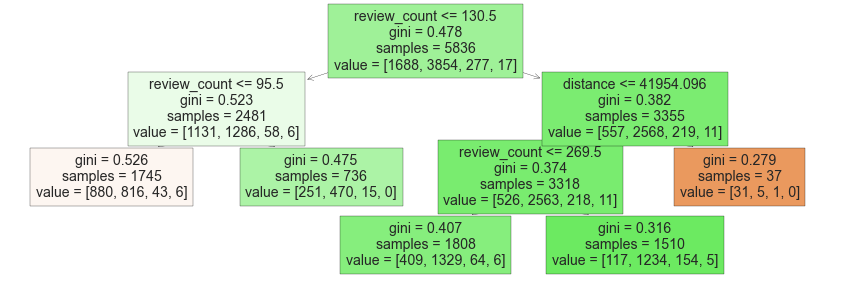

In [93]:
#first lets run it with the raw data itself
classifier = createDecisionTree(dummyDF.drop(['price', 'longitude', "latitude"], axis=1))

The model results here give us hope that we can beat the dummy model which is 65.9% accurate.  In the results above we see that the accuracy of this model is 68%.  In this experiment I made the max leaf nodes stop at 5 so that the top of the tree could more clearly be seen and interpreted.  The top left of the output also contains a confusion matrix.  The vertical axis of this table is the actual classification and the horizontal is the predicted.  So, the numbers along the diagnal are the correctly classified ones.  The accuracy is therefore the sum of the numbers along the diagnal divided by the total sum.  Recall refers to a horizontal row within the confusion matrix - for actual class 0 (inexpensive), there were 238+184+0+0 for 422 total of the actual class and 238 were classified correctly so recall is 238/422 or 0.56.  Precision refers to a vertical column in the confusion matrix - for predicted class 0 (inexpensive), there were 238+211+12+3 for a total of 464 total predicted as class 0 (inexpensive), and 238 were classified correctly, so precision is 238/464 or 0.51.  Also notice that in this model, it never pricey or ultra high-end.  These price levels occur the least in the dataset and the model did not find that fitting to them would be optimal.  Something to note, expecially with only going down to 5 leaf nodes, the model here is likely underfit to the data and may be able to perform better with different parameters.

So, in fine-tuning the model I will use GridSearchCV to perform cross-validation to find a better performing model.

There are many reasons I decided to use cross-validation.  First, compared to a leave-one-out approach, it is more computationally friendly.  Second, there are many benefits of using it.  The goal of machine learning here is to minimize the error in the tests, which are predicting/classifying for never seen before data.  When using cross validation, all data is used as both training and testing data as in our 10-fold cross validation, 10 different models are created for each depth, using 10% of the data for testing in each model and 90% for training.  Each increment of the 10% test data is stepped through, with the remaining 90% being the training data.  So, every data observation is used for testing at least once and every observation is used for training k-1 times.  When we have a bunch of models, the thought is to potentially combine them into one stronger model.

Another benefit is its balance for the variance-bias trade-off.  It has lower bias than just a single validation set approach since a single validation set approach is more dependent on how good the random split of the test and training sets was.  It also has lower variance than leave-one-out-cross-validation (LOOCV) as the model is more generalized rather than overfitting by training with all but one observation in the data.

In turn, we look to see what we can get out of these decision tree results.  Decision trees are built based on splitting each division by what will give the least amount of impurity.  We can use one of two techniques: Gini or Entropy.

Gini is measured by:

$\large G = 1 - \Sigma_i p_{i}^2$,

Where $p_{i}$ is the fraction of items labeled with class $i$ in the set.

We determine the information gain by calculating the entropy.  Entropy is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

Both Gini and Entropy are measures of impurity and used to calculate information gain.  Entropy is always between 0 and 1, the closer it is to 0 the better.  The higher the entropy, the more disordered the group is.  Information gain is the entropy of the parent group minus the entropy of the split so performance is maximized by minimizing the splits entropy.  It follows that when decision trees are created, they examine the entropy/gini of all possible splits, and choose the split with the highest information gain.

Knowing this, we can interpret our decision tree results.  In the graphic I created we see the root split is split based off of the review count and distance.  This tells us that these are the most important features when determining the price level of the business.

In [97]:
#Now lets try logistic regression
# this is a function that takes in the dataset and the parameters for the logistic regression function,
# fits the model outputs the results and returns the fitted model.
def createLogisticRegression(data, C_in= 1.0, penalty_in='l2', solver_in='lbfgs', max_iter_in=100):
    y = dummyDF['price'] #set the goal to be the classification
    lr = LogisticRegression(C = C_in, penalty = penalty_in, solver = solver_in, max_iter= max_iter_in)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=0)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(lr.score(X_test, y_test)))
    
    cv_fivefold = cross_validate(estimator= lr, 
                         X = data,
                         y = y,
                         cv = 5,
                         return_train_score= True, 
                         return_estimator= True, verbose = 2)
    validation_mean = cv_fivefold['test_score'].mean()
    validation_std = cv_fivefold['test_score'].std()
    print('Logistic Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))
    
    return lr

In [98]:
#Now lets try logistic regression
lr = createLogisticRegression(dummyDF.drop(['price', 'longitude', "latitude"], axis=1))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy of logistic regression classifier on test set: 0.654
[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................................................. , total=   1.4s
[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
Logistic Regression 5-fold cv results (Accuracy) 0.658 =/- 0.003


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished


Looking at the results of the logistic regression, these were worse than the results of the decision tree and only about as good as the dummy model.  For that reason, logistic regression is probably not a good approach to take.  I will perform GridSearchCV on it to see if other parameters might help, but it will most likely need to be thrown out.

In [100]:
## here let's apply sklearn Random Forest Classifier
# this is a function that takes in pandas dataframe as the dataset and from it computes the random forest, aiming
# to predict the weapon, and prints out a confusion matrix, report, and tree itself
def createRandomForest(dataSet, max_leaf_nodes_in= None, min_impurity_split_in=None, n_estimators_in=100, max_features_in='auto'):
    y = dummyDF['price'] #set the goal to be the classification
    X_train, X_test, y_train, y_test = train_test_split(dataSet, y, test_size=0.20, random_state = 1, stratify = y) #split the data

    classifier = RandomForestClassifier(max_leaf_nodes= max_leaf_nodes_in, min_impurity_split = min_impurity_split_in, n_estimators =n_estimators_in, max_features= max_features_in) #create the classifier and fit it
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)  #predict using the test data for metrics

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    cv_fivefold = cross_validate(estimator= classifier, 
                         X = dataSet,
                         y = y,
                         cv = 5,
                         return_train_score= True, 
                         return_estimator= True, verbose = 2)
    validation_mean = cv_fivefold['test_score'].mean()
    validation_std = cv_fivefold['test_score'].std()
    print('Random Forest 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))
    
    return classifier

In [110]:
rf = createRandomForest(dummyDF.drop(['price', 'longitude', "latitude"], axis=1))

[[253 168   1   0]
 [ 96 866   2   1]
 [  5  46  17   1]
 [  0   4   0   0]]
              precision    recall  f1-score   support

         1.0       0.71      0.60      0.65       422
         2.0       0.80      0.90      0.85       965
         3.0       0.85      0.25      0.38        69
         4.0       0.00      0.00      0.00         4

    accuracy                           0.78      1460
   macro avg       0.59      0.44      0.47      1460
weighted avg       0.77      0.78      0.77      1460

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ................................................. , total=   1.2s
[CV]  ................................................................
[CV] ................................................. , total=   1.4s
[CV]  ................................................................
[CV] ................................................. , total=   2.3s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
Random Forest 5-fold cv results (Accuracy) 0.824 =/- 0.048


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.4s finished


A random forest is a collection of decision trees, meant to be more robust than a single decision tree.  With that, the accuracy of random forests tends to be better than that of a regular decision tree but the interpretability drops and they take longer to train.  Looking at the above results, we can get a much better 78% accuracy with the decision tree that we got with logistic regression or with the regular decision tree.

In [103]:
#Now lets try logistic regression
# this is a function that takes in the dataset and the parameters for the logistic regression function,
# fits the model outputs the results and returns the fitted model.
def createNeuralNetowrk(data, C_in= 1.0, penalty_in='l2', solver_in='lbfgs', max_iter_in=100):
    y = dummyDF['price'] #set the goal to be the classification
    classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(lr.score(X_test, y_test)))
    
    cv_fivefold = cross_validate(estimator= classifier, 
                         X = data,
                         y = y,
                         cv = 5,
                         return_train_score= True, 
                         return_estimator= True, verbose = 2)
    validation_mean = cv_fivefold['test_score'].mean()
    validation_std = cv_fivefold['test_score'].std()
    print('Logistic Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))
    
    return classifier

In [107]:
rf = createNeuralNetowrk(dummyDF.drop(['price', 'longitude', "latitude"], axis=1))

Accuracy of logistic regression classifier on test set: 0.654
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
Logistic Regression 5-fold cv results (Accuracy) 0.660 =/- 0.000


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished


Looking at the results of the neural netowrk, these were again only about as good as the dummy model.  For that reason, neural netowrk is probably not a good approach to take.  I will perform GridSearchCV on it to see if other parameters might help such as adding more layers, but it will most likely need to be thrown out.

# Fine-tuning the Models

For our clustering models, we fine-tuned the kmeans model by using the KElbowVisualizer to see that the optimal number of clusters was 17.  When looking at the Hierarchical Clustering Dendrogram we can pick the number of clusters visually - and based on the dedrogram decided to have 12 clusters.  Therefore, when running AgglomerativeClustering I used 12 clusters.  I compared the silhouette_score to determine how good the clusters were as described above and found that the Agglomerative Clustering with 12 clusters and using the linkage "single" method is the best model.

For the classification model, I performed GridSearchCV for all of the potential models but will only show the one pertaining to the result here as shown above that the RandomForest worked best, GridSearchCV showed the same result.  Here is the optimal Random Forest I was able to find:

In [114]:
#Grid Search CV
#now lets try to find the best parameters for random forests
#this takes a pretty long time to run
rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(dummyDF.drop(['price', 'longitude', "latitude"], axis=1), dummyDF["price"], test_size=0.2, random_state=0)
#top commented out line takes longer to run but may give better results
#grid = {'n_estimators': [50,300,500,700], 'max_leaf_nodes': [5, 15, 25, 100], 'ccp_alpha': [0, 0.01, 0.1, 1, 10], 'criterion' : ['gini', 'entropy'], "min_impurity_split":[0,0.1,0.3,0.5], "n_jobs": [4]}
grid = {'n_estimators': [50,100], 'max_leaf_nodes': [15, 30, None], "min_impurity_split":[0,0.5, None], "n_jobs": [4]}
grid_search_cv = GridSearchCV(estimator = rf, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.7s
[CV] max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.8s
[CV] max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 
[CV]  max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.6s
[CV] max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 
[CV]  max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.8s
[CV] max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 
[CV]  max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   2.2s
[CV] max_leaf_nodes=15, min_impurity_split=0, n_estimators=100, n_jobs=4 
[CV]  max_leaf_nodes=15, min_impurity_split=0, n_estimators=100, n_jobs=4, total=   1.2s
[CV] max_leaf_nodes=15, min_impurity_split=0, n_estimators=100, n_jobs=4 
[CV]  max_leaf_nodes=15, min_impurity_split=0, n_estimators=100, n_jobs=4, total=   3.0s
[CV] max_leaf_nodes=15, min_impurity_split=0, n_estimators=100, n_jobs=4 
[CV]  max_leaf_nodes=15, min_

[CV]  max_leaf_nodes=30, min_impurity_split=None, n_estimators=50, n_jobs=4, total=   0.7s
[CV] max_leaf_nodes=30, min_impurity_split=None, n_estimators=50, n_jobs=4 
[CV]  max_leaf_nodes=30, min_impurity_split=None, n_estimators=50, n_jobs=4, total=   0.6s
[CV] max_leaf_nodes=30, min_impurity_split=None, n_estimators=50, n_jobs=4 
[CV]  max_leaf_nodes=30, min_impurity_split=None, n_estimators=50, n_jobs=4, total=   0.6s
[CV] max_leaf_nodes=30, min_impurity_split=None, n_estimators=50, n_jobs=4 
[CV]  max_leaf_nodes=30, min_impurity_split=None, n_estimators=50, n_jobs=4, total=   0.5s
[CV] max_leaf_nodes=30, min_impurity_split=None, n_estimators=100, n_jobs=4 
[CV]  max_leaf_nodes=30, min_impurity_split=None, n_estimators=100, n_jobs=4, total=   0.8s
[CV] max_leaf_nodes=30, min_impurity_split=None, n_estimators=100, n_jobs=4 
[CV]  max_leaf_nodes=30, min_impurity_split=None, n_estimators=100, n_jobs=4, total=   1.0s
[CV] max_leaf_nodes=30, min_impurity_split=None, n_estimators=100, n_j

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.8min finished


{'mean_fit_time': array([0.95498457, 1.53617764, 0.52033935, 0.93920321, 0.62724957,
        1.03388743, 0.71820722, 0.73229079, 0.66094012, 1.09426064,
        0.51519589, 0.84622107, 1.09591727, 1.7183938 , 0.47380762,
        0.82016315, 0.8742353 , 2.44459562]),
 'std_fit_time': array([0.56187236, 0.70682071, 0.13393855, 0.2891986 , 0.17811537,
        0.14009001, 0.25015986, 0.12239821, 0.28275667, 0.11936424,
        0.05824005, 0.20907303, 0.17799982, 0.49741794, 0.0783622 ,
        0.17929768, 0.17960361, 0.6561844 ]),
 'mean_score_time': array([0.064466  , 0.17323785, 0.08812075, 0.11630735, 0.0923142 ,
        0.15130868, 0.08059907, 0.10223083, 0.07456203, 0.12149673,
        0.06671028, 0.07892599, 0.09776258, 0.10400538, 0.04646921,
        0.13666449, 0.07160516, 0.18452182]),
 'std_score_time': array([0.02016092, 0.08422117, 0.0573644 , 0.05392245, 0.03969247,
        0.06215796, 0.0403982 , 0.04186715, 0.0390913 , 0.04241333,
        0.03012745, 0.0336454 , 0.0283835 , 

In [115]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,16,17,13,12,10,11,6,7,5,0,1,4,8,3,14,15,2,9
mean_fit_time,0.874235,2.4446,1.71839,1.09592,0.515196,0.846221,0.718207,0.732291,1.03389,0.954985,1.53618,0.62725,0.66094,0.939203,0.473808,0.820163,0.520339,1.09426
std_fit_time,0.179604,0.656184,0.497418,0.178,0.0582401,0.209073,0.25016,0.122398,0.14009,0.561872,0.706821,0.178115,0.282757,0.289199,0.0783622,0.179298,0.133939,0.119364
mean_score_time,0.0716052,0.184522,0.104005,0.0977626,0.0667103,0.078926,0.0805991,0.102231,0.151309,0.064466,0.173238,0.0923142,0.074562,0.116307,0.0464692,0.136664,0.0881207,0.121497
std_score_time,0.0655498,0.0556957,0.0209877,0.0283835,0.0301275,0.0336454,0.0403982,0.0418671,0.062158,0.0201609,0.0842212,0.0396925,0.0390913,0.0539224,0.0105591,0.0421276,0.0573644,0.0424133
param_max_leaf_nodes,None,None,None,None,30,30,30,30,15,15,15,15,30,15,None,None,15,30
param_min_impurity_split,None,None,0,0,None,None,0,0,None,0,0,None,0.5,0.5,0.5,0.5,0.5,0.5
param_n_estimators,50,100,100,50,50,100,50,100,100,50,100,50,50,100,50,100,50,100
param_n_jobs,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
params,"{'max_leaf_nodes': None, 'min_impurity_split':...","{'max_leaf_nodes': None, 'min_impurity_split':...","{'max_leaf_nodes': None, 'min_impurity_split':...","{'max_leaf_nodes': None, 'min_impurity_split':...","{'max_leaf_nodes': 30, 'min_impurity_split': N...","{'max_leaf_nodes': 30, 'min_impurity_split': N...","{'max_leaf_nodes': 30, 'min_impurity_split': 0...","{'max_leaf_nodes': 30, 'min_impurity_split': 0...","{'max_leaf_nodes': 15, 'min_impurity_split': N...","{'max_leaf_nodes': 15, 'min_impurity_split': 0...","{'max_leaf_nodes': 15, 'min_impurity_split': 0...","{'max_leaf_nodes': 15, 'min_impurity_split': N...","{'max_leaf_nodes': 30, 'min_impurity_split': 0...","{'max_leaf_nodes': 15, 'min_impurity_split': 0...","{'max_leaf_nodes': None, 'min_impurity_split':...","{'max_leaf_nodes': None, 'min_impurity_split':...","{'max_leaf_nodes': 15, 'min_impurity_split': 0...","{'max_leaf_nodes': 30, 'min_impurity_split': 0..."
split0_test_score,0.769692,0.762842,0.758562,0.765411,0.688356,0.683219,0.681507,0.684075,0.680651,0.678938,0.678938,0.671233,0.663527,0.663527,0.663527,0.663527,0.663527,0.663527


The above GridSearchCV was run with 18 candidates for a total of 180 fits.  There is a commented out version of parameters that runs for more, but takes a while to run so for simplicity I brought the number of potential fits down.  It turns out that the highest test accuracy of random forests actually comes from using the model's defaults.  The optimal model is then as follows:

In [117]:
#Optimal random forest:
rf = createRandomForest(dummyDF.drop(['price', 'longitude', "latitude"], axis=1))

[[254 167   1   0]
 [ 95 866   3   1]
 [  6  46  16   1]
 [  0   4   0   0]]
              precision    recall  f1-score   support

         1.0       0.72      0.60      0.65       422
         2.0       0.80      0.90      0.85       965
         3.0       0.80      0.23      0.36        69
         4.0       0.00      0.00      0.00         4

    accuracy                           0.78      1460
   macro avg       0.58      0.43      0.46      1460
weighted avg       0.77      0.78      0.76      1460

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   2.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ................................................. , total=   3.4s
[CV]  ................................................................
[CV] ................................................. , total=   1.4s
[CV]  ................................................................
[CV] ................................................. , total=   1.9s
[CV]  ................................................................
[CV] ................................................. , total=   2.9s
Random Forest 5-fold cv results (Accuracy) 0.829 =/- 0.042


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.7s finished


The accuracy of the random forest by itself appears to be about 78% and the accuracy during the 5-fold cross validation I saw get up to ~83%.  Please note that these numbers may vary slightly based on the randomness of the train test split.

# Presenting the Solution

Some of the interpretations relevant to determining the hidden groups within businesses around UMBC:
 - The optimal model we found was an agglomerative cluster using 12 clusters - so 12 different groups of similar businesses.
 - Over 98% of the businesses were clustered into the same cluster - which seems wrong.  I think that the businesses should be different enough to not all be in the same cluster.  The model did not pick up on differences in location or type.
 - We can potentially see that the businesses with a large number of reviews and a high rating are ones that are successful and unlikely to be going away anytime soon.  This has the potential to show prospective business owners what a good business model looks like.
 
In conclusion, the model was less helpful as most of the businesses were classified in the one cluster.  More fine tuning of the model would be needed to see if we can tune the data or prep it in a different way that would allow the model to better see the differences we wanted to see in things like location or the price level.

In terms of the predicting of the price level, the random forests were relatively successful.  I was able to get the accuracy up to roughly 83% based on the cross validation which very well beats the 65.9% accuracy of the dummy model.  This tells us that the price level can be determined by the features of the business.  And in order to predict what price level a future business would need to be at, they would just need to plugin the features to the model to get a prediction.  This is very helpful for projections and fincances as prospective business owners look to set prices.  The most important features looked to be the review count and distance.  The number of reviews is telling to how good the business is - more reviews tends to mean that it is more popular and people have experienced it - so a goal of new business owners is then to grow its popularity and ask for feedback to gather as many reviews as possible.  Secondly, distance is the next most important feature as the location is seen to be as a key to the business' success.  The proximity to UMBC and area the business is in affects the success of it very much so.

This model achieves the business objective by first identifying types of businesses that have the demand and opportunity to be successful.  Following, we can plug that information of what businesses are in demand to determine what the price level for that business would need to be to make it successful.  The answers to those questions give entrepenuers the ability to analyze the market and we can provide them with the best opportunities to be successful business owners.



# Limitations and Later Work

Limitations:
Bilding off of the clustering project I still found it difficult to actually use the results of the clustering to find the hidden groups and patterns within them.  I feel like this part of finding the similar characteristics within each of the clusters was again spent less time on than the time spent finding the optimal model.  Analyzing a lot of dimensions for each cluster to spot similarities is a difficult task and if I had more time that one area where I would spend it - finding better interpretations.  It becomes basically impossible to visualize.

One of the challenges to exploring this data is finding trends that are specific down to a specific latitude or longitude.  There are so many unique coordinates that analyzing each and everyone of these situations is difficult.  Another limitation is in the nature of the data being categorical data.  Categorical data is a little bit more of a challenge to represent in these machine learning models and the feature engineering portion of the project with one-hot encoding is important to represent the data well in the models.  But, with so many features, the data also becomes nearly impossible to visualize.

I will be honest, I ran short on time for this project due to some circumstances and did my best to do as much as I could with it.

Later work:

We could potentially play more with the number of clusters to see if we can get more out of using a higher or lower number of clusters - or potentially different interpretations based on the different similarities between what is in each of the clusters.  I would definitely spend more time analyzing to be able to better interpret the similarities between the clusters.  I also would like to tune the input to see if differences in location and price level become more prevalent.  I expected the clusters to be unevenly numbered in terms of instances, but not by that much.

I also think that it would be a great idea to actually go out ant talk to entreprenuers themselves to see what information they would be interested in knowing prior to starting a business and what they see as necessary information for success.  Following, I would tune my problem and solution towards the most important parts of the business.

# References and Contributions

Data contributions:
- Yelp API: https://api.yelp.com/v3/businesses/search

Machine learning references and contributions:
- Professor Guner's lecture notes
- Sklearn documentation: https://scikit-learn.org/stable/index.html
- ISLR Textbook: https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
- Dealing with categorical data: https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
- Feature Engineering guidance: https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

